In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage

#Load the CSV file into a DataFrame
df = pd.read_csv('Transaction_Data_new.csv') 


In [303]:
df[df['Transaction_Amount'].isna()==1]

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type


In [305]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(0)
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,1/1/23 00:00,3472,Purchase
1,3,916,1/1/23 02:00,10,Purchase
2,4,109,1/1/23 03:00,72,Investment
3,5,889,1/1/23 04:00,1793,Investment
4,6,348,1/1/23 05:00,3824,Loan Payment


In [307]:
df['Transaction_Type'].unique()

array(['Purchase', 'Investment', 'Loan Payment', 'Bill Payment'],
      dtype=object)

In [309]:
df.describe()

,Transaction_ID,Customer_ID,Transaction_Amount
count,4940.000000,4940.000000,4940.000000
mean,2500.811336,504.403846,2485.667206
std,1443.977748,291.694641,1437.583246
min,1.000000,1.000000,10.000000
25%,1250.750000,250.750000,1235.750000
50%,2503.500000,508.000000,2476.000000
75%,3750.250000,764.000000,3695.750000
max,5000.000000,1000.000000,4999.000000


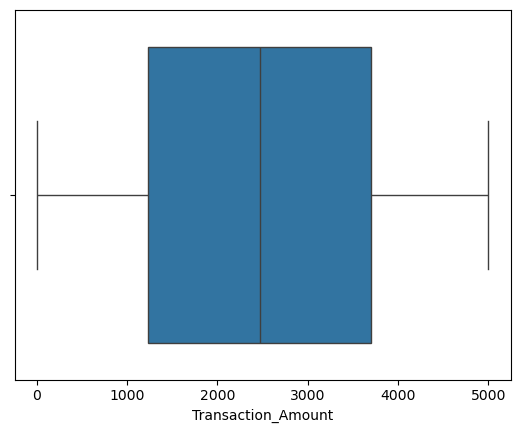

In [311]:
# Boxplot
sns.boxplot(x=df['Transaction_Amount'])
plt.show()

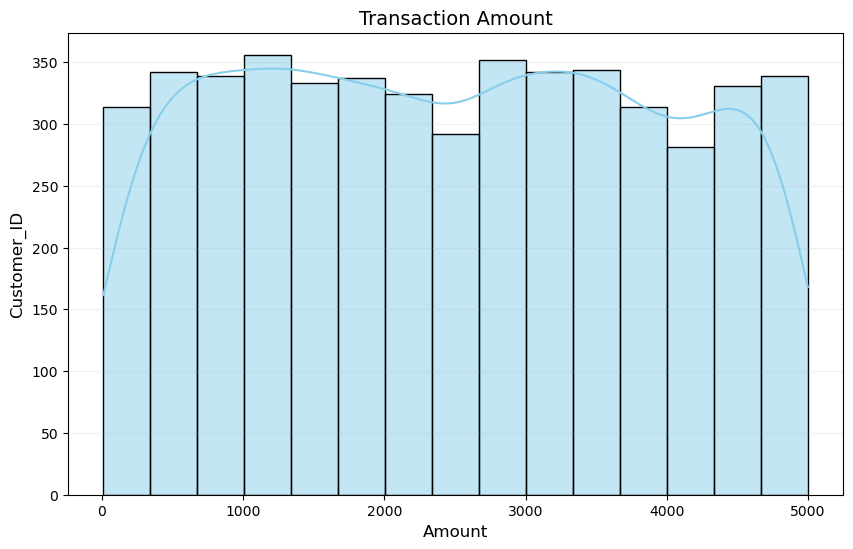

In [313]:
# Plot histogram with Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Transaction_Amount', kde=True, bins=15, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Transaction Amount', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Customer_ID', fontsize=12)
plt.grid(axis='y', alpha=0.2)

plt.show()

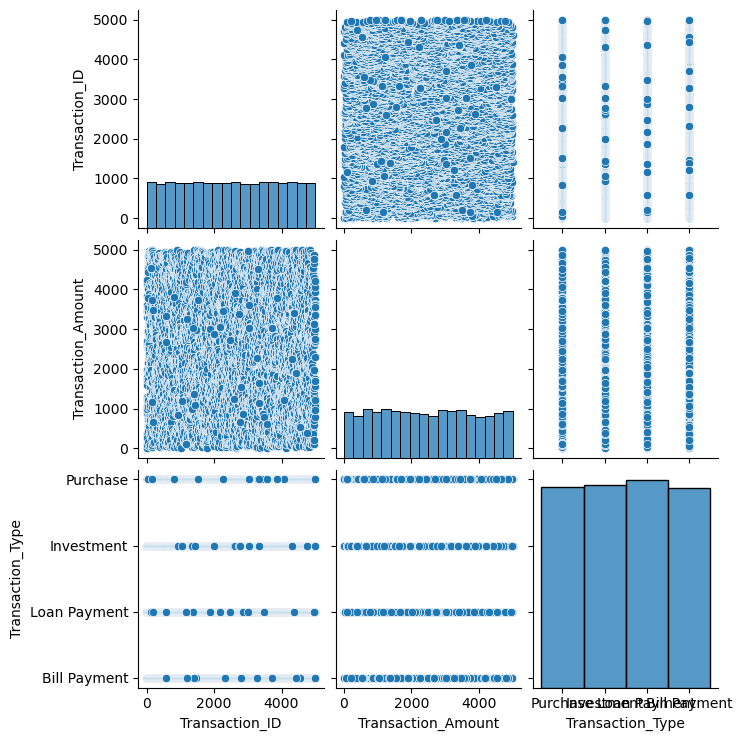

In [315]:
sns.pairplot(df, vars=['Transaction_ID','Transaction_Amount', 'Transaction_Type'],)
plt.show()

In [317]:
# Function to calculate Z-scores and detect outliers
def detect_outliers_zscore(df, numerical_columns, threshold=3):

    # Calculate Z-scores for specified numerical columns
    z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
    
    # Add Z-scores to the DataFrame
    for col in numerical_columns:
        df[f'{col}_Z-Score'] = z_scores[col]
    
    # Identify outliers (absolute Z-score > threshold)
    outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]
    
    return outliers

# Specify the numerical columns to analyze
numerical_columns = ['Transaction_ID', 'Transaction_Amount']  # Include both columns

# Detect outliers
outliers = detect_outliers_zscore(df, numerical_columns, threshold=3)

# Print results
print("Original DataFrame:")
print(df.head())  # Display the first few rows of the original data
print("\nOutliers detected using Z-Score method:")
print(outliers)

Original DataFrame:
   Transaction_ID  Customer_ID Transaction_Date  Transaction_Amount  \
0               1          393     1/1/23 00:00                3472   
1               3          916     1/1/23 02:00                  10   
2               4          109     1/1/23 03:00                  72   
3               5          889     1/1/23 04:00                1793   
4               6          348     1/1/23 05:00                3824   

  Transaction_Type  Transaction_ID_Z-Score  Transaction_Amount_Z-Score  
0         Purchase               -1.731198                    0.686105  
1         Purchase               -1.729813                   -1.722104  
2       Investment               -1.729120                   -1.678976  
3       Investment               -1.728428                   -0.481828  
4     Loan Payment               -1.727735                    0.930960  

Outliers detected using Z-Score method:
Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Date, T

In [319]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_ID_Z-Score,Transaction_Amount_Z-Score
0,1,393,1/1/23 00:00,3472,Purchase,-1.731198,0.686105
1,3,916,1/1/23 02:00,10,Purchase,-1.729813,-1.722104
2,4,109,1/1/23 03:00,72,Investment,-1.729120,-1.678976
3,5,889,1/1/23 04:00,1793,Investment,-1.728428,-0.481828
4,6,348,1/1/23 05:00,3824,Loan Payment,-1.727735,0.930960


In [321]:
# One-Hot Encoding for Transaction Type
Ttype_encoder = OneHotEncoder(sparse_output=False)
Ttype_encoded = Ttype_encoder.fit_transform(df[['Transaction_Type']])

In [323]:
# Creating DataFrame for One-Hot Encoded transaction type
Ttype_df = pd.DataFrame(Ttype_encoded, columns=Ttype_encoder.get_feature_names_out(['Transaction_Type']))

In [325]:
# Concatenating One-Hot Encoded preferences with original DataFrame
df_encoded = pd.concat([df, Ttype_df], axis=1)

In [327]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_ID_Z-Score,Transaction_Amount_Z-Score
0,1,393,1/1/23 00:00,3472,Purchase,-1.731198,0.686105
1,3,916,1/1/23 02:00,10,Purchase,-1.729813,-1.722104
2,4,109,1/1/23 03:00,72,Investment,-1.729120,-1.678976
3,5,889,1/1/23 04:00,1793,Investment,-1.728428,-0.481828
4,6,348,1/1/23 05:00,3824,Loan Payment,-1.727735,0.930960


In [329]:
# One-Hot Encoding for Transaction Type
Ttype_encoder = OneHotEncoder(sparse_output=False)
Ttype_encoded = Ttype_encoder.fit_transform(df[['Transaction_Type']])

In [331]:
# Creating DataFrame for One-Hot Encoded transaction type
Ttype_df = pd.DataFrame(Ttype_encoded, columns=Ttype_encoder.get_feature_names_out(['Transaction_Type']))

In [333]:
# Concatenating One-Hot Encoded preferences with original DataFrame
df_encoded = pd.concat([df, Ttype_df], axis=1)

In [335]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_ID_Z-Score,Transaction_Amount_Z-Score
0,1,393,1/1/23 00:00,3472,Purchase,-1.731198,0.686105
1,3,916,1/1/23 02:00,10,Purchase,-1.729813,-1.722104
2,4,109,1/1/23 03:00,72,Investment,-1.729120,-1.678976
3,5,889,1/1/23 04:00,1793,Investment,-1.728428,-0.481828
4,6,348,1/1/23 05:00,3824,Loan Payment,-1.727735,0.930960


In [337]:
# Selecting features for clustering (including encoded transaction types)
X = df_encoded[['Transaction_ID', 'Customer_ID', 'Transaction_Amount', 'Transaction_Type_Bill Payment', 'Transaction_Type_Investment', 'Transaction_Type_Loan Payment', 'Transaction_Type_Purchase'] + list(Ttype_df.columns)]

In [339]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [341]:
# Displaying first 5 rows of the scaled features
print("\nFirst 5 rows of scaled features:\n", X_scaled[:5])


First 5 rows of scaled features:
 [[-1.73137321 -0.38195808  0.68617427 -0.57111689 -0.57703861 -0.5870124
   1.74145142 -0.57111689 -0.57703861 -0.5870124   1.74145142]
 [-1.72998801  1.41119432 -1.72227788 -0.57111689 -0.57703861 -0.5870124
   1.74145142 -0.57111689 -0.57703861 -0.5870124   1.74145142]
 [-1.72929541 -1.35567754 -1.67914557 -0.57111689  1.73298629 -0.5870124
  -0.57423365 -0.57111689  1.73298629 -0.5870124  -0.57423365]
 [-1.72860281  1.3186224  -0.48187632 -0.57111689  1.73298629 -0.5870124
  -0.57423365 -0.57111689  1.73298629 -0.5870124  -0.57423365]
 [-1.7279102  -0.53624461  0.93105445 -0.57111689 -0.57703861  1.70354152
  -0.57423365 -0.57111689 -0.57703861  1.70354152 -0.57423365]]


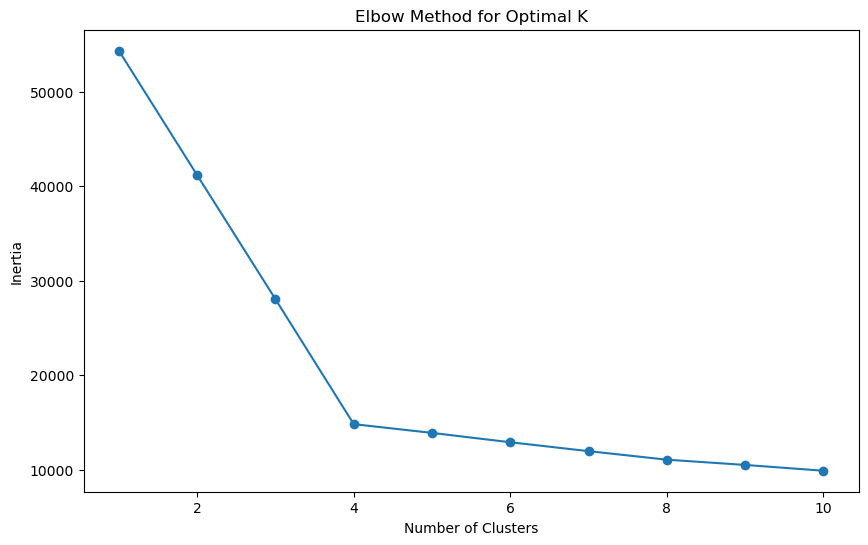

In [343]:
# Determining optimal K using Elbow Method
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [353]:
# Applying K-Means with optimal K 
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluating K-Means
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(X_scaled, df['KMeans_Cluster'])

print(f'K-Means Silhouette Score: {silhouette_kmeans}')
print(f'K-Means Calinski-Harabasz Score: {calinski_kmeans}')

K-Means Silhouette Score: 0.40067881510069336
K-Means Calinski-Harabasz Score: 3172.418125938006


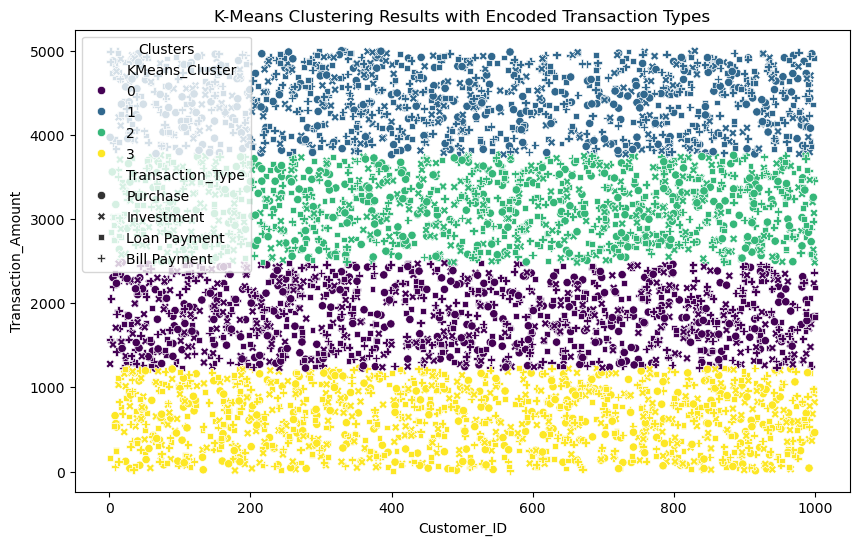

In [355]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['KMeans_Cluster'] = kmeans.fit_predict(df_encoded[['Customer_ID', 'Transaction_Amount']])

# Plotting K-Means Clusters with encoded preferences
plt.figure(figsize=(10, 6))

# Scatter plot for Age vs Income
sns.scatterplot(x='Customer_ID', y='Transaction_Amount', hue='KMeans_Cluster', style='Transaction_Type',
                palette='viridis', data=df_encoded) #The marker differentiation ONLY APPLIES TO CATEGORICAL FEATURES, advisable to 2-5 distinct categories.

# Adding title and labels
plt.title('K-Means Clustering Results with Encoded Transaction Types')
plt.xlabel('Customer_ID')
plt.ylabel('Transaction_Amount')
plt.legend(title="Clusters")
plt.show()

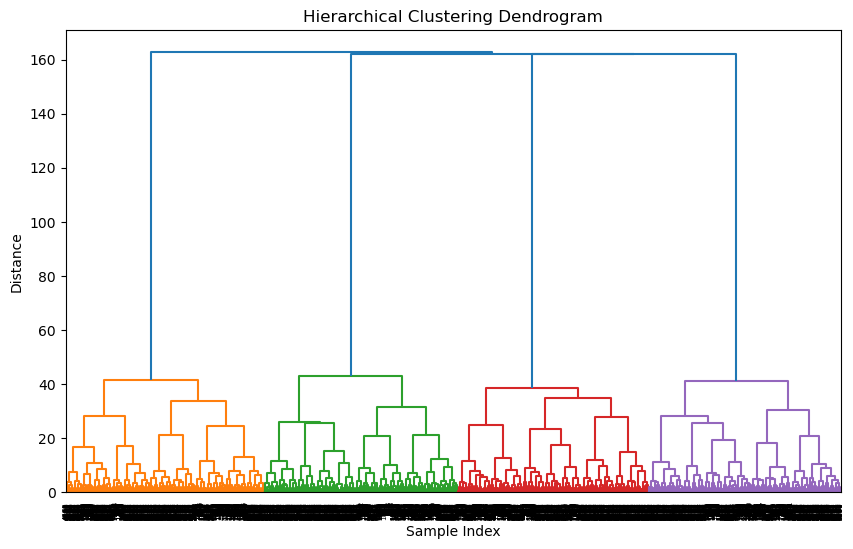

In [358]:
# Applying Hierarchical Clustering
# Generate the linkage matrix (this is where the hierarchical merging happens)
Z = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram to visually inspect the number of clusters
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [366]:
# Apply Hierarchical Clustering with the chosen number of clusters
hier_cluster = AgglomerativeClustering(n_clusters=5)  # Change this number based on your observation
df['Hier_Cluster'] = hier_cluster.fit_predict(X_scaled)

# Evaluating Hierarchical Clustering
silhouette_hier = silhouette_score(X_scaled, df['Hier_Cluster'])
calinski_hier = calinski_harabasz_score(X_scaled, df['Hier_Cluster'])

print(f'Hierarchical Silhouette Score: {silhouette_hier}')
print(f'Hierarchical Calinski-Harabasz Score: {calinski_hier}')

Hierarchical Silhouette Score: 0.47188539579094513
Hierarchical Calinski-Harabasz Score: 3592.9255181599788


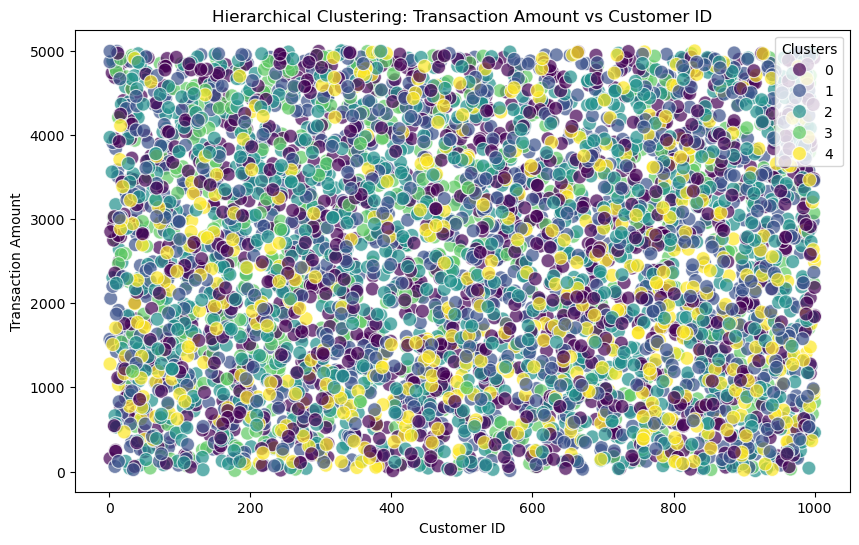

In [368]:
# Visualizing the clusters based on Transaction Amount vs Customer ID
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_ID', y='Transaction_Amount', hue='Hier_Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering: Transaction Amount vs Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Amount')
plt.legend(title='Clusters')
plt.show()

In [364]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Evaluating DBSCAN
unique_labels = len(set(df['DBSCAN_Cluster']))
print(f'Number of clusters identified by DBSCAN: {unique_labels}')

Number of clusters identified by DBSCAN: 5
